In [2]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Перемножение матриц

In [30]:
import numpy as np
import time

def my_mul(A, B):
    if A.ndim == 2 and B.ndim == 2:
        assert A.shape[1] == B.shape[0], "Invalid shapes"
        C = np.zeros((A.shape[0], B.shape[1]))
        for i in range(C.shape[0]):
            for j in range(C.shape[1]):
                a = A[i, :]
                b = B[:, j]
                # c = [a[k]*b[k] for k in range(len(a))]
                c = a * b
                C[i, j] = np.sum(c)
        return C
    else:
        raise NotImplementedError

In [34]:
    N = np.random.randint(200, 1000)
    M = np.random.randint(50, 500)
    K = np.random.randint(200, 1000)
    print(N, M, K)
    A = np.random.randint(0, 10000, N*M).reshape((N, M))
    B = np.random.randint(0, 10000, M*K).reshape((M, K))
    start = time.process_time()
    C = my_mul(A, B)
    print(f'My mul time   {(time.process_time() - start) * 1000} ms')
    start = time.process_time()
    C1 = A.dot(B)
    print(f'Orig mul time {(time.process_time() - start) * 1000} ms')
    print(f'Check {np.all(C == C1)}')

912 363 390
My mul time   1.1220000000005115 ms
Orig mul time 133.60400000000004 ms
Check False


## Титаник

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [3]:
data = pd.read_csv('train.csv',
                  index_col='PassengerId')

In [4]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Примеры создания признаков**

In [5]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [6]:
age_categories = [age_category(age) for age in data.Age]

In [7]:
data['Age_category'] = age_categories

**Другой способ - c apply**

In [8]:
data['Age_category'] = data['Age'].apply(age_category)

In [9]:
data['Num_relatives'] = data['Parch'] + data['SibSp']

In [10]:
data['Num_relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Num_relatives, dtype: int64

**1. Сколько мужчин / жещин находилось на борту?**

In [10]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной Pclass (социально-экономический статус). Дополнительно - это же распределение только для мужчин / женщин.**


In [11]:
pd.crosstab(data['Pclass'],data['Sex'],margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386
All,0.242424,0.206510,0.551066


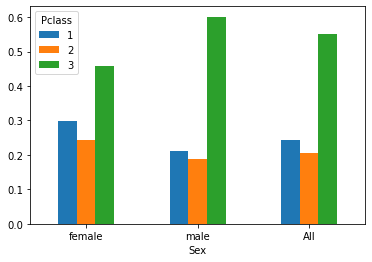

In [11]:
AAA = pd.crosstab(data['Sex'], data['Pclass'], margins=True, normalize='index')
display(AAA)

AAA.plot.bar(rot=0)
plt.show()

**3. Сколько в среднем заплатил один пассажир? Найдите стандартное отклонение этой величины. Лучше округлить до 2 десятичных знаков.**

In [12]:
#data['Fare'].mean()
round(data['Fare'].std(),2)

49.69

**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60.**

In [13]:
pd.crosstab(data['Age'].apply(lambda x: 1 if x<30 else 2 if x>60 else 0),data['Survived'])

Survived,0,1
Age,,
0,304,181
1,228,156
2,17,5


**5. Правда ли, что женщины выживали чаще мужчин?**

In [14]:
pd.crosstab(data['Sex'],data['Survived']).apply(lambda x: x/x.sum() , axis=1)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [53]:
a=data[data['Sex']=='male']
#a['Name'].apply(lambda x:x.split('. ')[1].split()[0]).describe()
a['Name'].apply(lambda x: x[x.find('.')+2:100])

PassengerId
1          Owen Harris
5        William Henry
6                James
7            Timothy J
8        Gosta Leonard
            ...       
884    Frederick James
885           Henry Jr
887             Juozas
890        Karl Howell
891            Patrick
Name: Name, Length: 577, dtype: object

In [20]:
first_names = data[data['Sex'] == 'male']['Name'].apply(lambda full_name:
                full_name.split(',')[1].split()[1])
first_names.value_counts().head()

William    35
John       25
George     14
Charles    13
Thomas     13
Name: Name, dtype: int64

**7. Сравните распределение стоимости билетов у спасенных и у погибших.**

In [16]:
data[data['Survived']==1]['Fare'].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
data[data['Survived']==0]['Fare'].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [31]:
data.groupby(['Pclass',"Sex"])[['Age']].agg('mean')


Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [46]:
pd.crosstab(data['Pclass'],data['Sex'],values=data['Age'],aggfunc='mean')


Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589
